# Reading a dataset and performing basic field statistics and distributions

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()
print('LOAD DURATION: ', dt.datetime.now() - start_time)

LOAD DURATION:  0:00:00.000021


In [2]:
%%time
data = pd.read_csv('card transactions_2025.csv')
# data = pd.read_json('transactions.txt', lines=True)
data.head()

CPU times: user 46.2 ms, sys: 7.59 ms, total: 53.8 ms
Wall time: 54.4 ms


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [ ]:
print('data.shape=',data.shape)
data.dropna(how='all', axis=1, inplace=True) # dropping any empty columns
print('data.shape=',data.shape)
print(data.info())

data.shape= (98393, 10)
data.shape= (98393, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98393 entries, 0 to 98392
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             98393 non-null  int64  
 1   Cardnum            98393 non-null  int64  
 2   Date               98393 non-null  object 
 3   Merchnum           94970 non-null  object 
 4   Merch description  98393 non-null  object 
 5   Merch state        97181 non-null  object 
 6   Merch zip          93664 non-null  float64
 7   Transtype          98393 non-null  object 
 8   Amount             98393 non-null  float64
 9   Fraud              98393 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.5+ MB
None


In [4]:
data.tail().transpose()

,98388,98389,98390,98391,98392
Recnum,98389,98390,98391,98392,98393
Cardnum,5142276053,5142225701,5142226486,5142244619,5142243247
Date,12/31/10,12/31/10,12/31/10,12/31/10,12/31/10
Merchnum,3500000006160,8090710030950,4503057341100,8834000695412,9108347680006
Merch description,BEST BUY 00001610,MARKUS OFFICE SUPPLIES,"TECH PAC, INC",BUY.COM,STAPLES NATIONAL #471
Merch state,KY,OH,OH,CA,NJ
Merch zip,41042.0,45248.0,45150.0,92656.0,7606.0
Transtype,P,P,P,P,P
Amount,84.79,118.75,363.56,2202.03,554.64
Fraud,0,0,0,0,0


In [5]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

print(mem_usage(data))

34.18 MB


In [6]:
# add a dummy categorical column for the case the fields all look numeric. This helps build the stats tables.
data['dummy'] = 'temp'

In [7]:
df_stats = pd.DataFrame(data.count(),columns=['count'])
df_stats['isna'] = data.isna().sum()
df_stats['% pop'] = 1 - data.isna().sum()/len(data)
df_stats

,count,isna,% pop
Recnum,98393,0,1.000000
Cardnum,98393,0,1.000000
Date,98393,0,1.000000
Merchnum,94970,3423,0.965211
Merch description,98393,0,1.000000
Merch state,97181,1212,0.987682
Merch zip,93664,4729,0.951938
Transtype,98393,0,1.000000
Amount,98393,0,1.000000
Fraud,98393,0,1.000000


In [8]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Recnum,98393.0,NaN,NaN,NaN,49197.0,28403.756855,1.0,24599.0,49197.0,73795.0,98393.0
Cardnum,98393.0,NaN,NaN,NaN,5142201833.277286,55610.415971,5142110002.0,5142152067.0,5142195612.0,5142245738.0,5142847398.0
Date,98393,365,2/28/10,691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchnum,94970,13091,930090121224,9485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch description,98393,13126,GSA-FSS-ADV,1715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch state,97181,227,TN,12243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch zip,93664.0,NaN,NaN,NaN,44676.458394,28365.178554,1.0,20855.0,38118.0,63103.0,99999.0
Transtype,98393,4,P,98038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,98393.0,NaN,NaN,NaN,424.290926,9922.487427,0.01,33.37,137.03,425.0,3102045.53
Fraud,98393.0,NaN,NaN,NaN,0.025327,0.157117,0.0,0.0,0.0,0.0,1.0


### Making best guess to automatically set numerics or categoricals

In [9]:
# after you run it you may want to switch some field to the other type and rerun
df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # you can adjust this upper limit for your data set
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch some if desired            
switch_n2c = ['Merch zip','Cardnum']
switch_c2n = []
numerics = [s for s in numerics if s not in switch_n2c]
categoricals = [s for s in categoricals if s not in switch_c2n]
numerics.extend(switch_c2n)
categoricals.extend(switch_n2c)
categoricals.remove('dummy')
data = data.drop(columns='dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)     

numerics: ['Amount']

categoricals: ['Date', 'Merchnum', 'Merch description', 'Merch state', 'Transtype', 'Recnum', 'Fraud', 'Merch zip', 'Cardnum']


In [10]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [11]:
%%time
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.2f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx',index=False)
stats_dfnum

CPU times: user 78.5 ms, sys: 11 ms, total: 89.5 ms
Wall time: 99.8 ms


,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,Amount,numeric,98393,100.00%,0,0.01,3102045.53,424.290926,9922.44,3.62


In [12]:
%%time
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.2f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

CPU times: user 83.6 ms, sys: 2.49 ms, total: 86.1 ms
Wall time: 85.7 ms


,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,Date,categorical,98393,100.00%,0,365,2/28/10
1,Merchnum,categorical,94970,96.52%,0,13091,930090121224
2,Merch description,categorical,98393,100.00%,0,13126,GSA-FSS-ADV
3,Merch state,categorical,97181,98.77%,0,227,TN
4,Transtype,categorical,98393,100.00%,0,4,P
5,Recnum,categorical,98393,100.00%,0,98393,1
6,Fraud,categorical,98393,100.00%,95901,2,0
7,Merch zip,categorical,93664,95.19%,0,4567,38118.0
8,Cardnum,categorical,98393,100.00%,0,1645,5142148452


In [13]:
# Drop any column that has only a single value (it's not a useful column)
cats_drop = []
data.drop(cats_drop, axis=1, inplace=True)
categoricals = list(set(categoricals)  - set(cats_drop))

In [14]:
%%time
def get_dup_columns(m):
    '''
    This will check every column in data frame and verify if you have duplicated columns.
    The result will be a list of tuples showing what columns are duplicates. For example: (column A, column C)
    That means that column A is duplicated with column C
    '''
    headers_list = [x for x in m.columns]
    duplicate_col2 = []
    y = 0
    while y <= len(headers_list)-1:
        for x in range(1,len(headers_list)-1):
            if m[headers_list[y]].equals(m[headers_list[x]]) == False:        
                continue
            else:
                duplicate_col2.append((headers_list[y],headers_list[x]))
        headers_list.pop(0)  
    return duplicate_col2

# You can use this cell if you want to see if any of the columns are identical
duplicate_col = get_dup_columns(data)
duplicate_col

CPU times: user 745 µs, sys: 337 µs, total: 1.08 ms
Wall time: 739 µs


[]

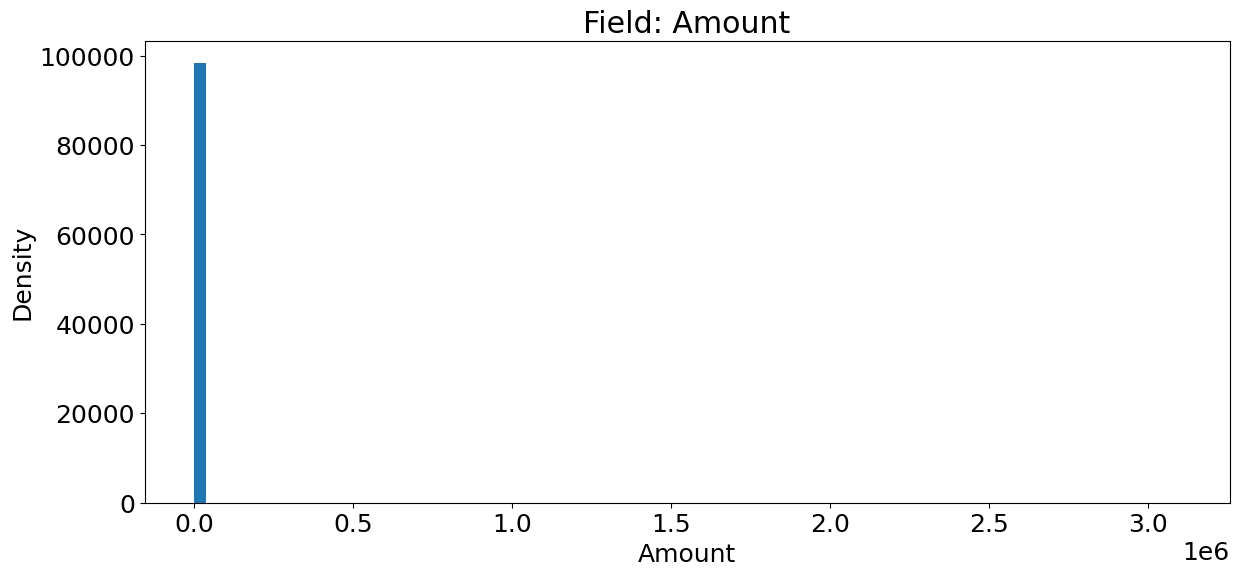

In [15]:
# plot numerics distributions if desired
plt.rcParams.update({'figure.figsize':(14,6)})
plt.rcParams.update({'font.size':18})
for col in numerics:
    plt.hist(data[col],bins=80)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('Field: ' + col)
    plt.show()

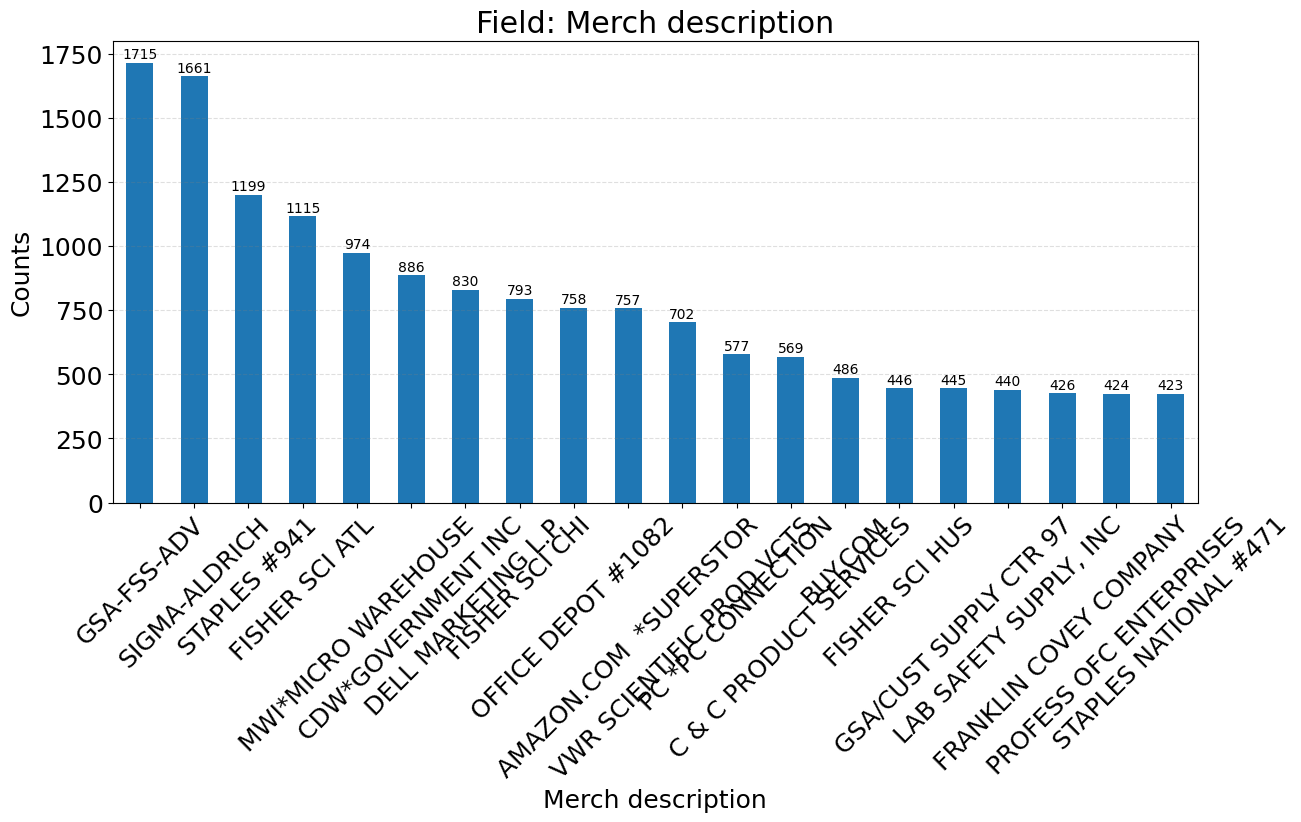

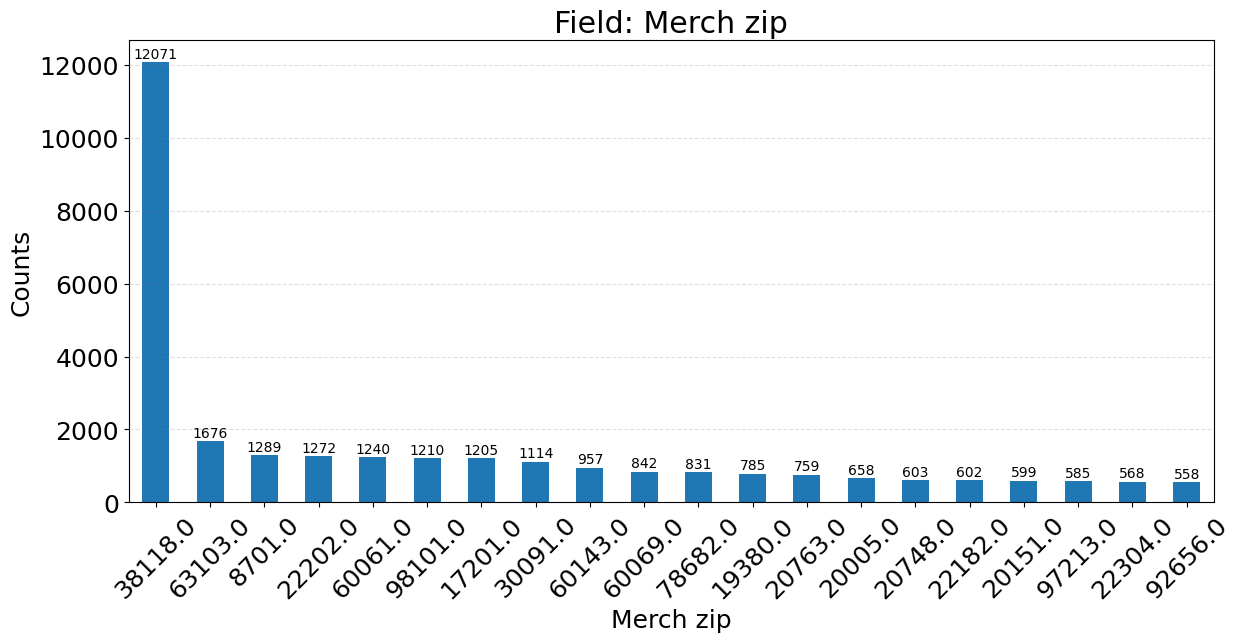

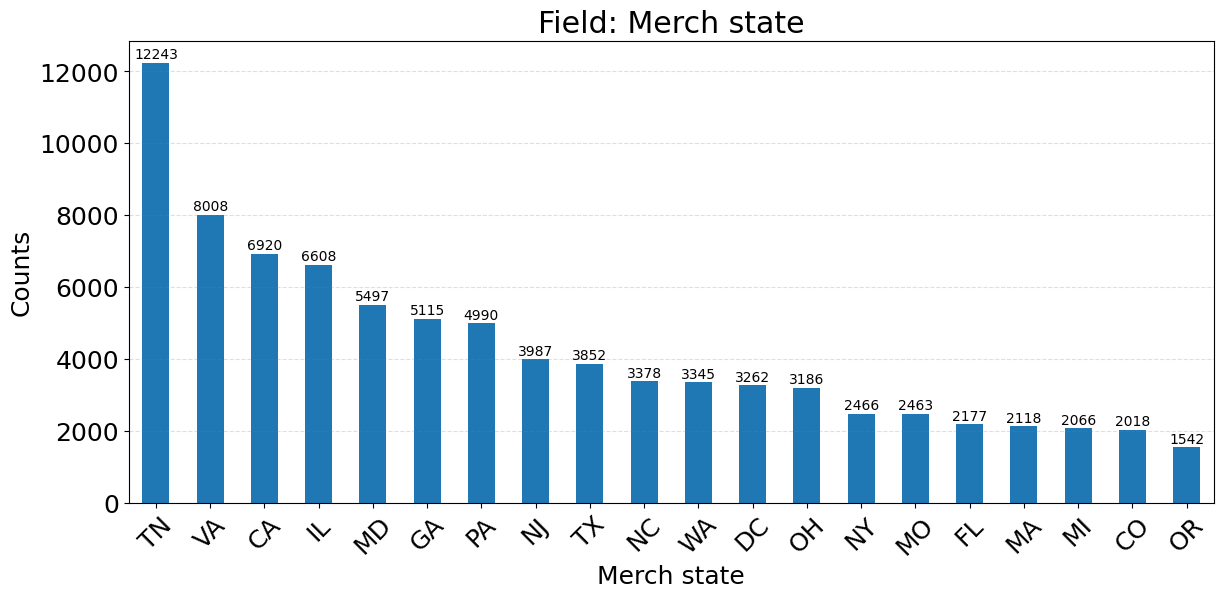

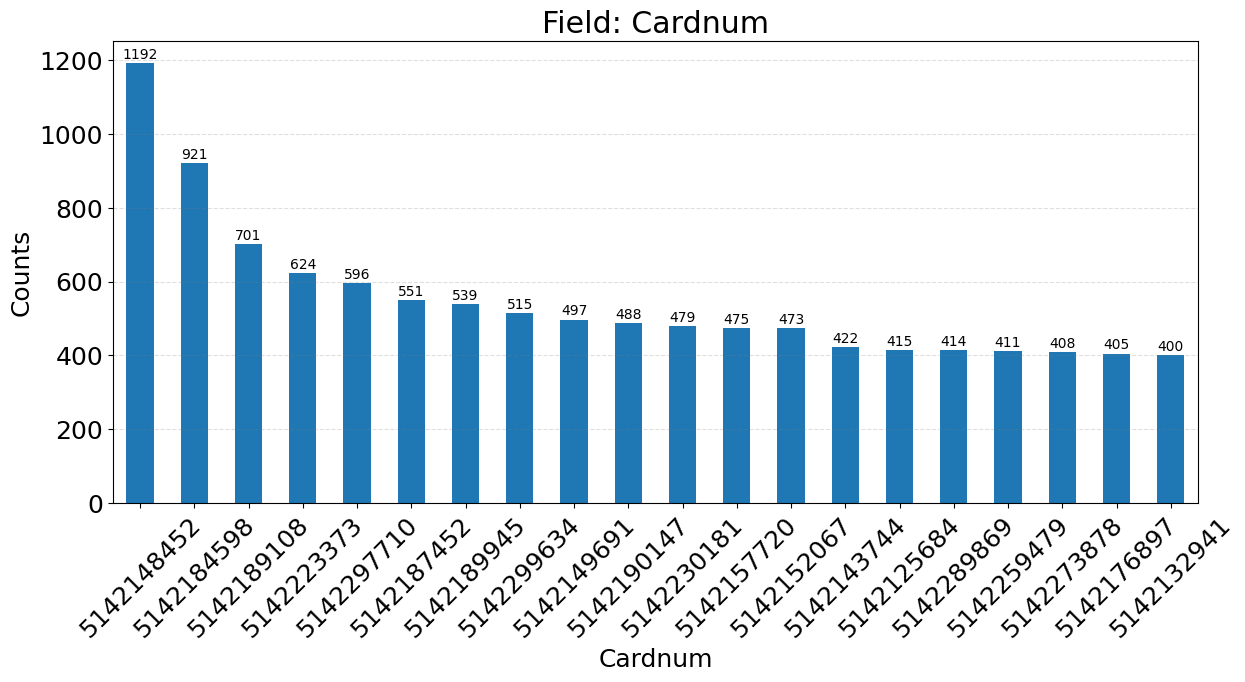

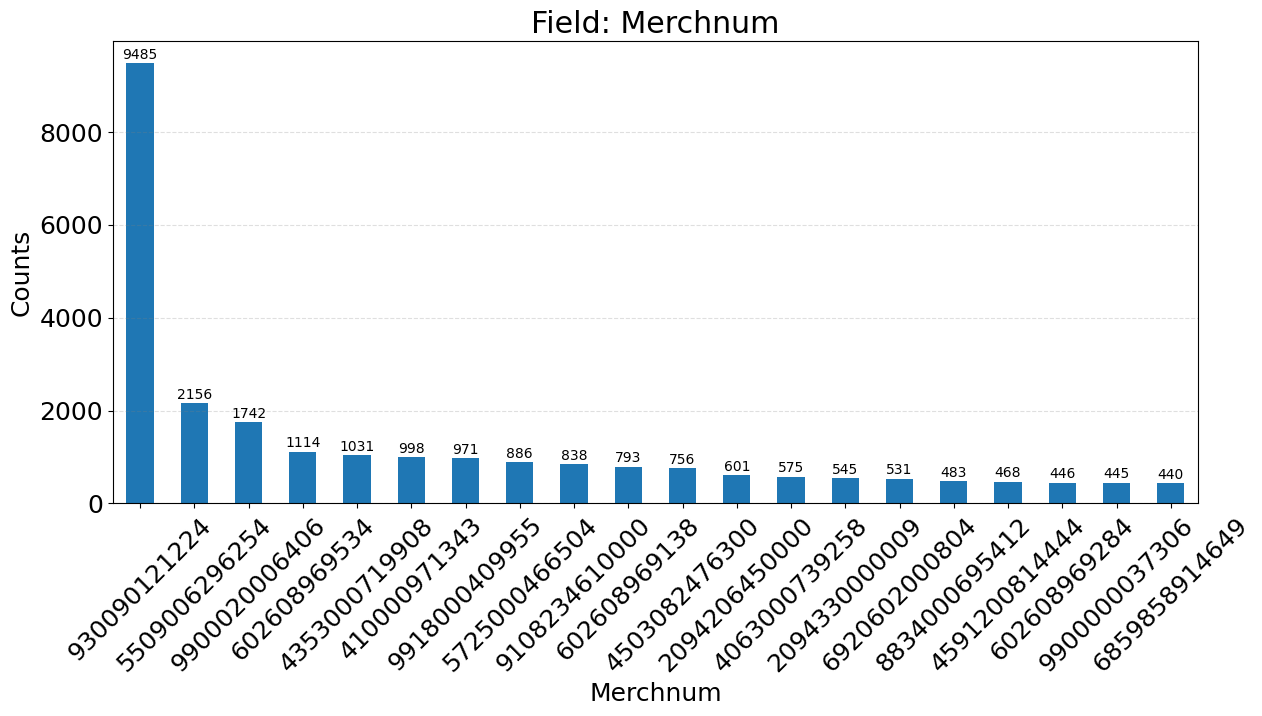

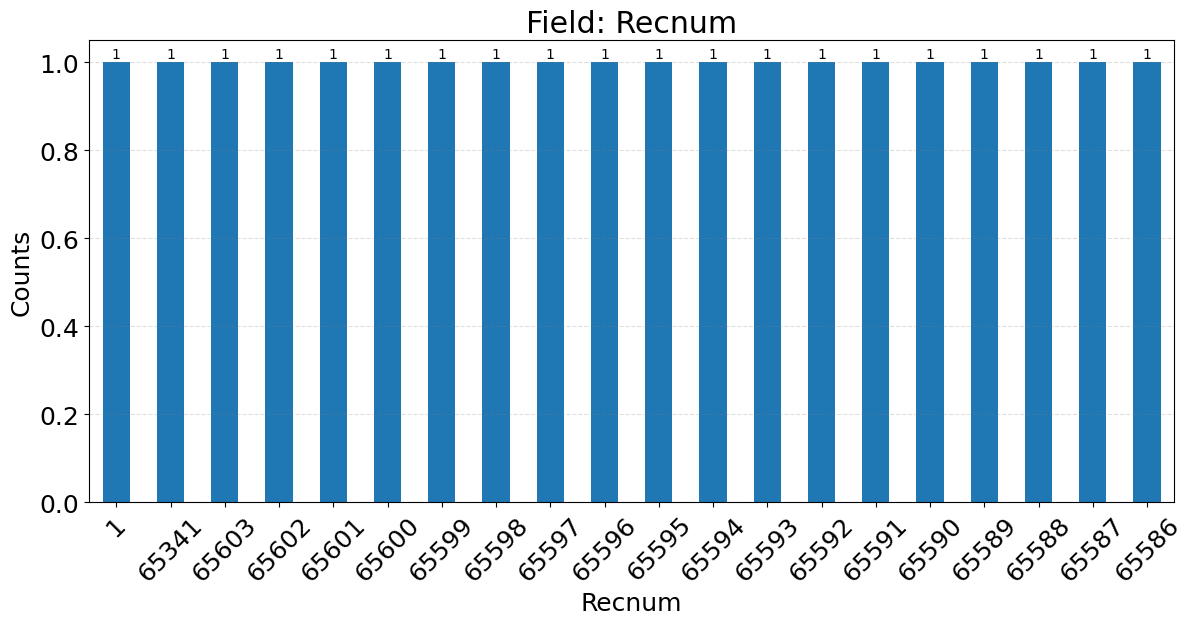

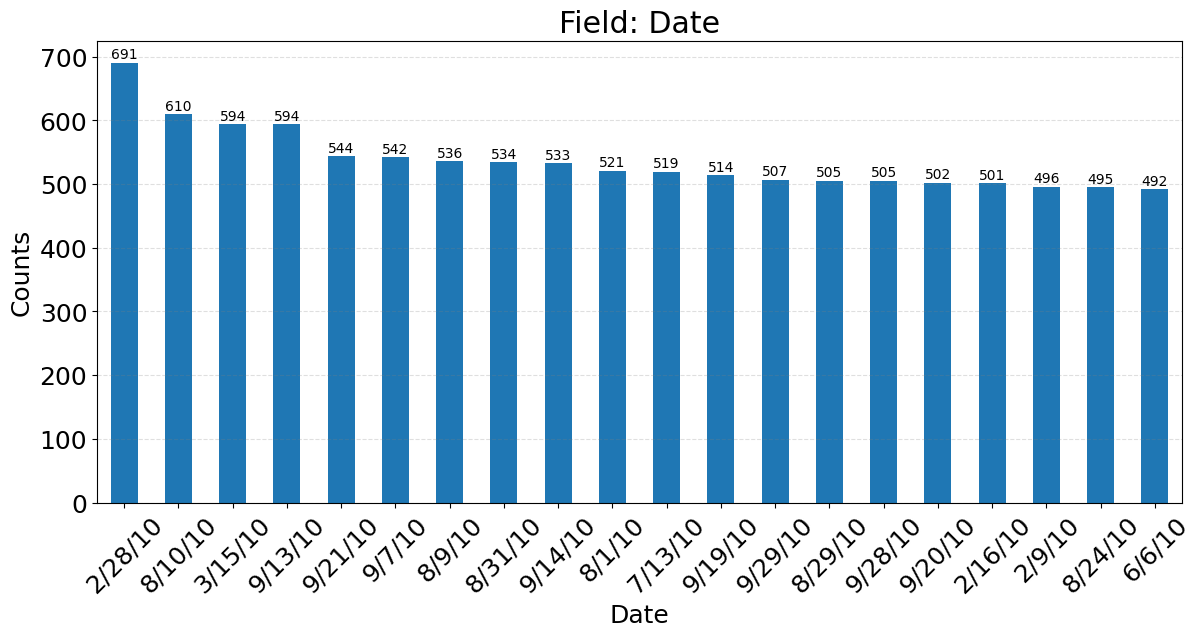

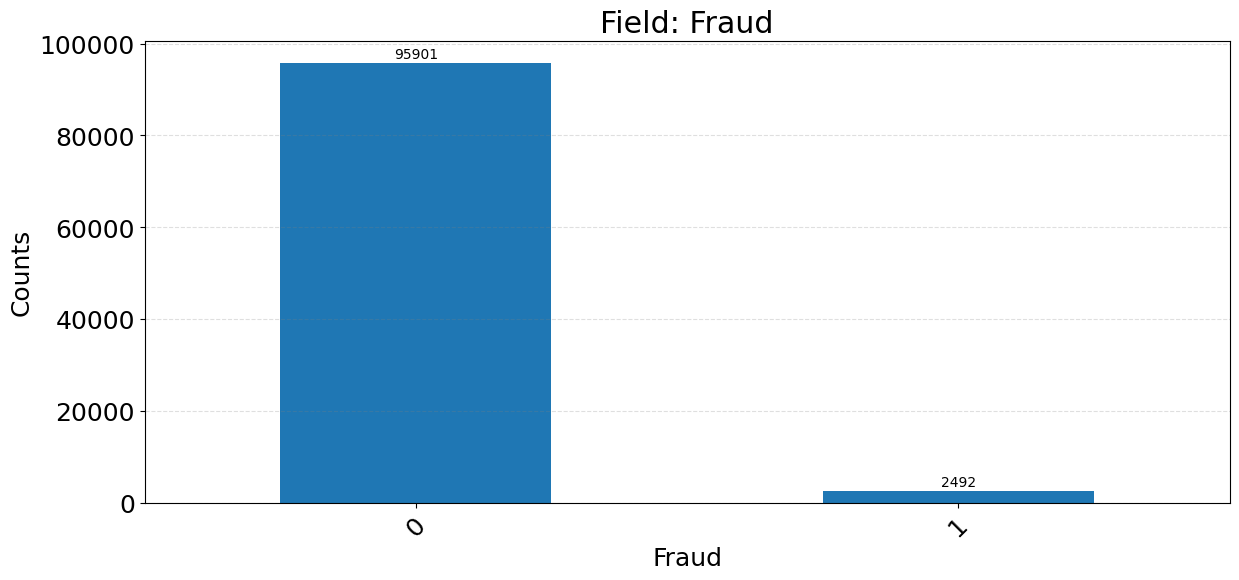

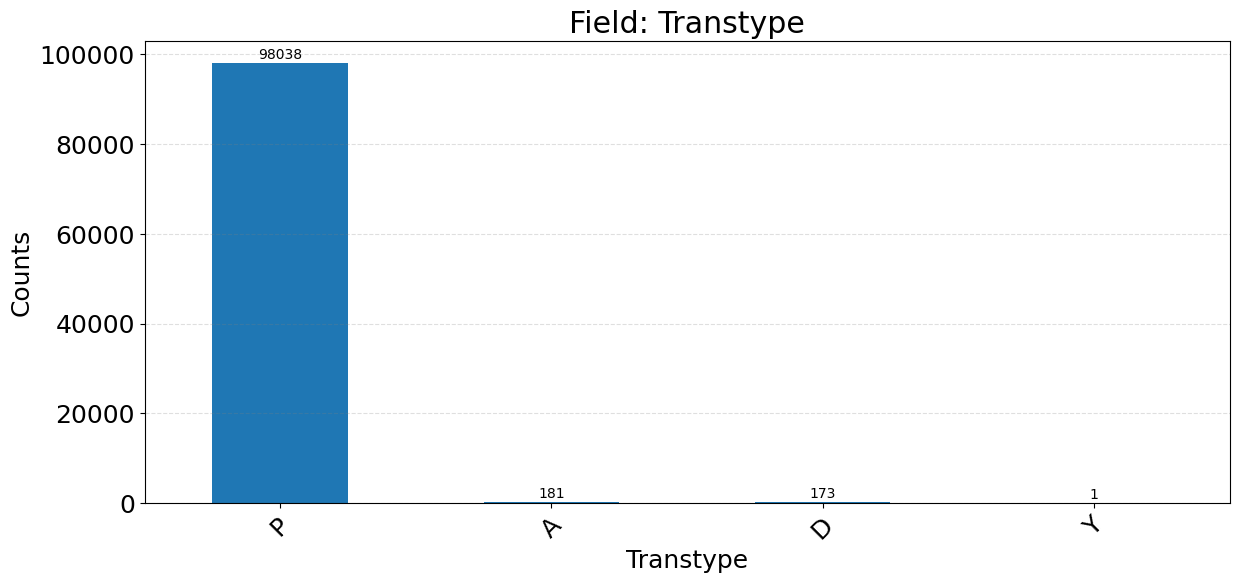

In [16]:
# plot categorical histograms if desired
for col in categoricals:
    counts = data[col].value_counts().head(20)
    ax = counts.plot(kind='bar')
    plt.xticks(rotation=45)
    for i, v in enumerate(counts):
        ax.text(i, v + counts.max()*.01, v, ha='center', color='black', fontsize=10)

    plt.title('Field: ' + col)
    plt.xlabel(col)
    plt.ylabel('Counts')
    ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
    plt.show()

overall dependent variable label rate is:  0.025327004969865743
98393 different values for Recnum
1645 different values for Cardnum


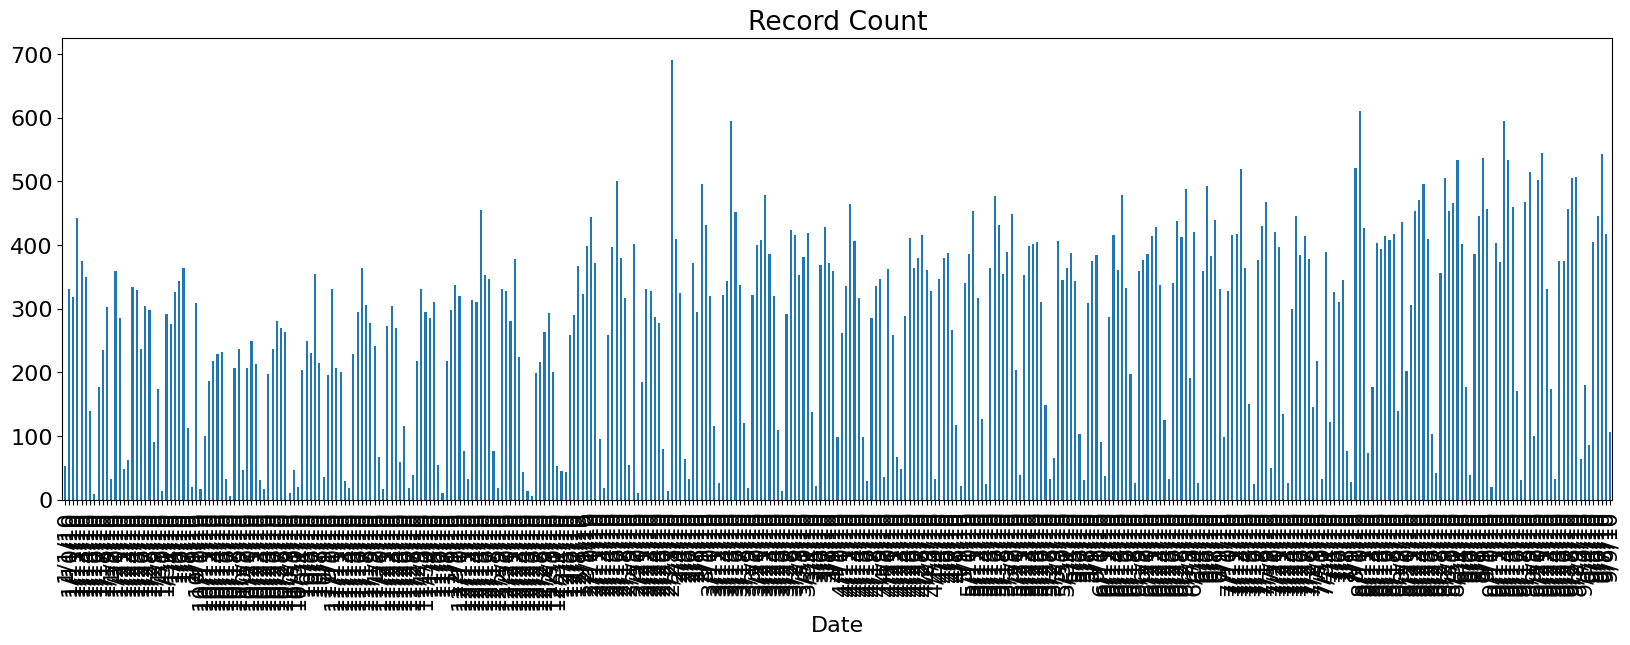

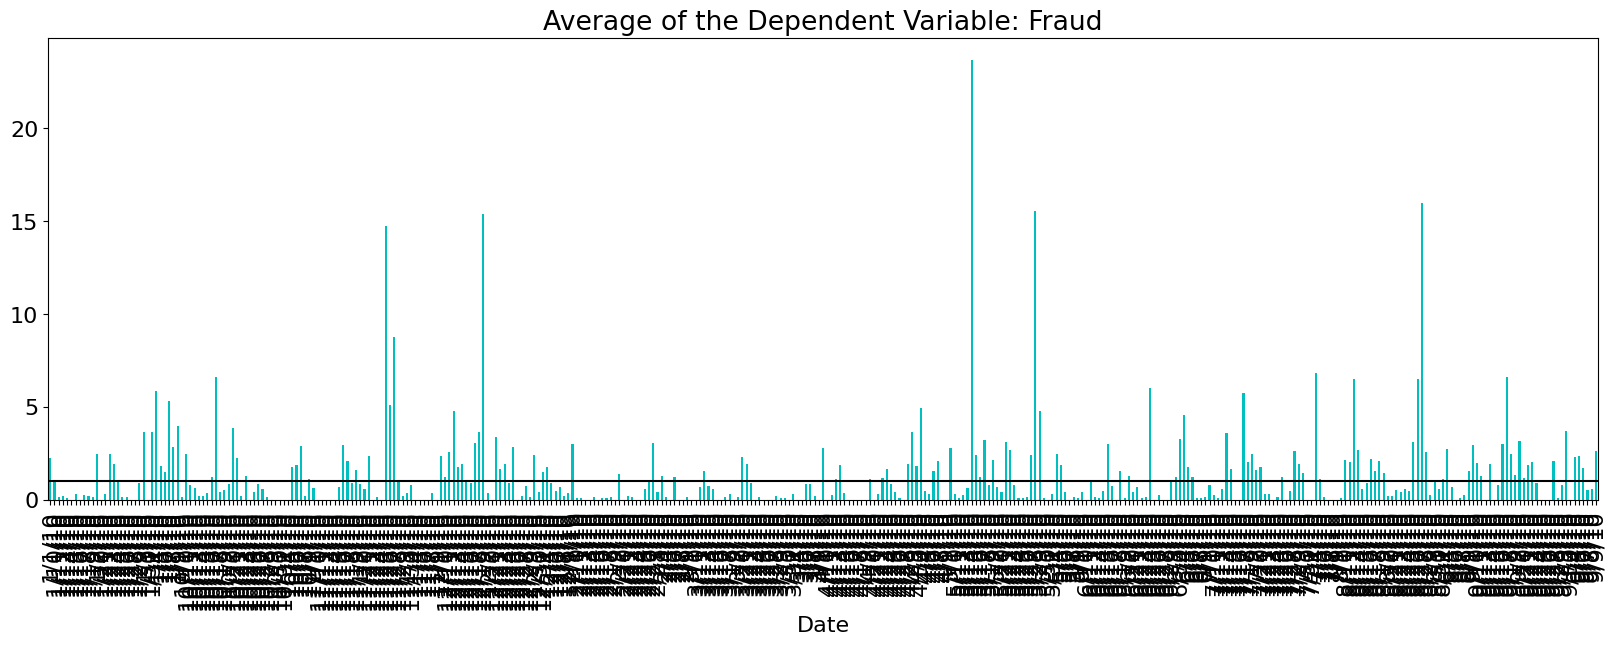

13091 different values for Merchnum
13126 different values for Merch description


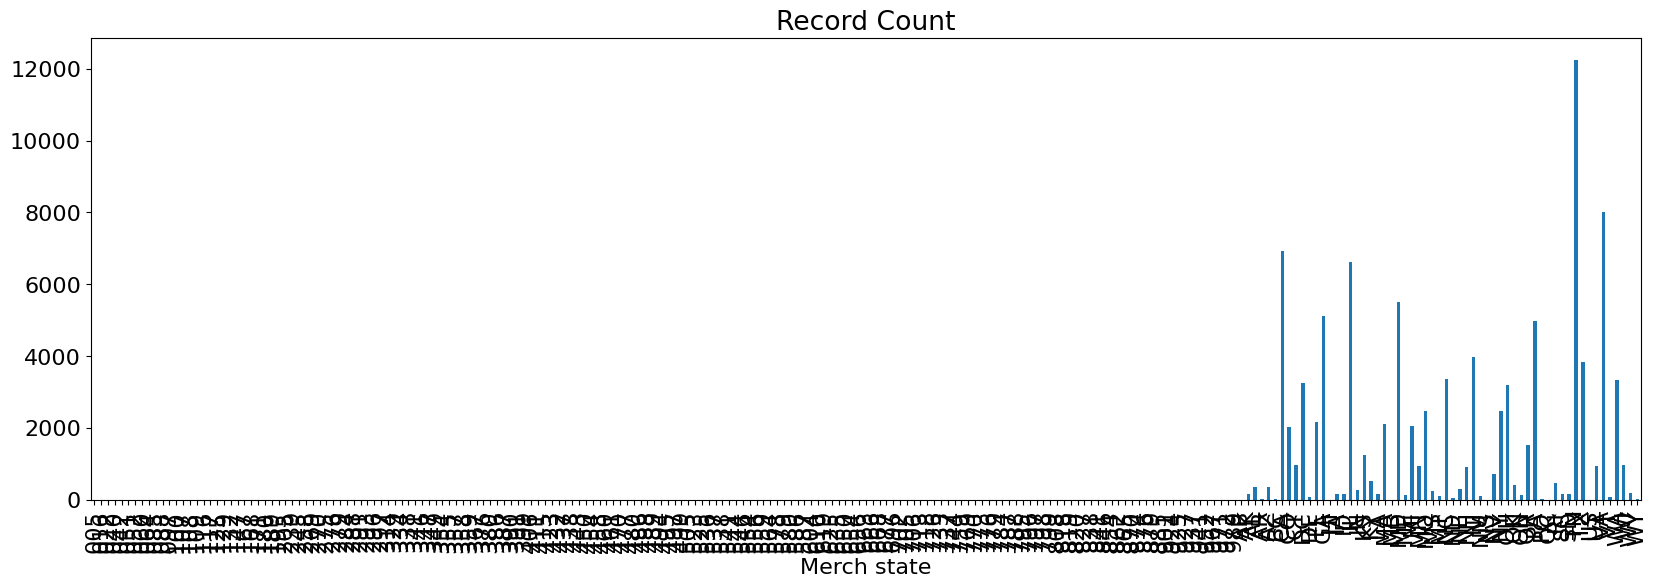

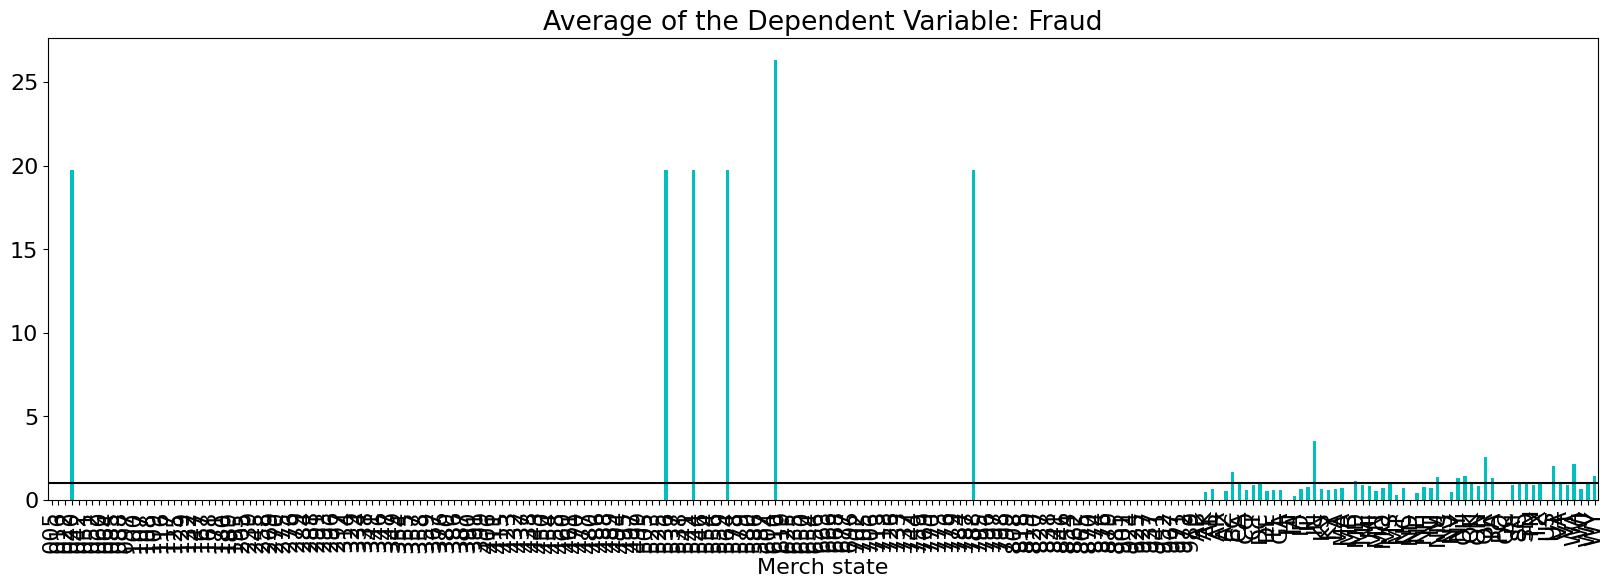

4567 different values for Merch zip


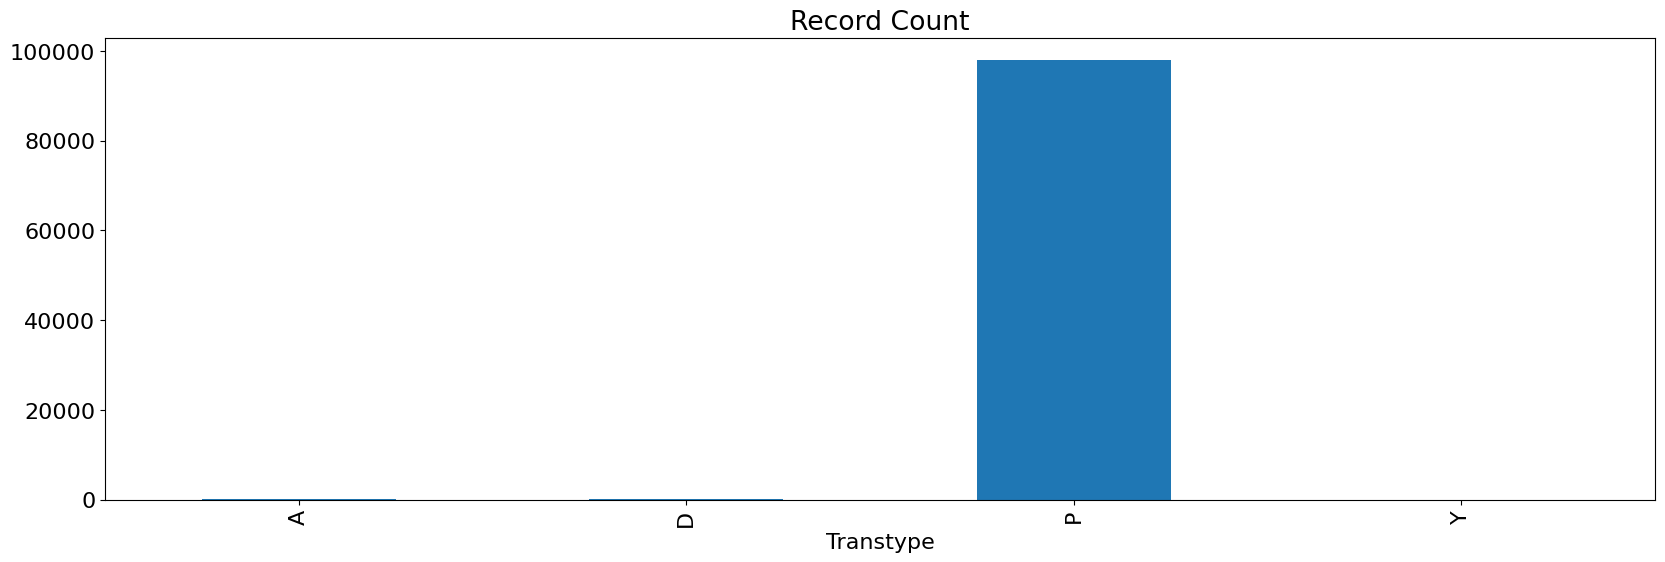

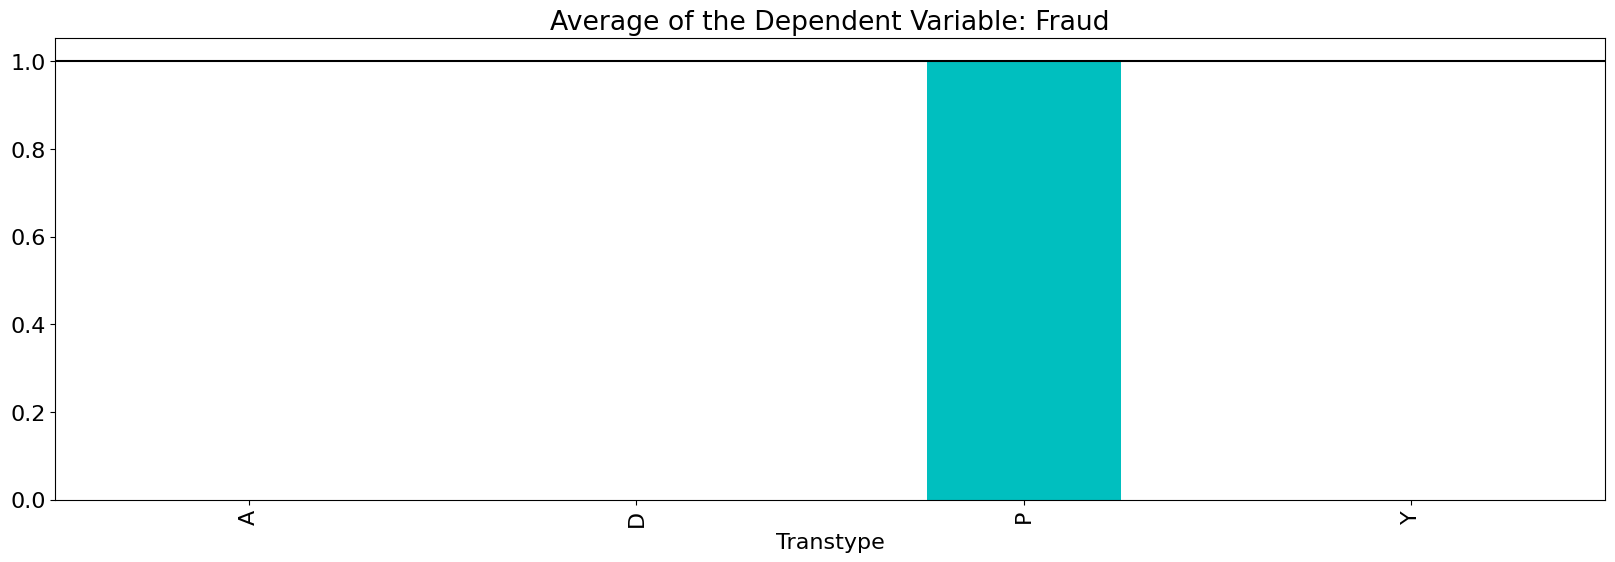

35565 different values for Amount


In [ ]:
# Supervised problem with a dependent variable y. 
# It looks at the univariate relationship between x and y.

dep_var = 'Fraud'

# sometimes need to convert the dependent variable to a number, particularly for a binary classification problem
# data[dep_var] = data[dep_var].map({False: 0, True: 1})
rate = data[dep_var].mean()

print('overall dependent variable label rate is: ', rate)
# Plot field distributions and compare with average of the dependent variable y (horizontal line)
plt.rcParams["figure.figsize"] = [20,6]
plt.rcParams.update({'font.size': 16})
plot_cols=data.columns.tolist()
# remove any fields we don't want to plot
# I put the range very high (370) so I could see a plot of 365 days. Usually you should set this to maybe 20 or so
plot_cols.remove(dep_var)
for col in plot_cols:
    num = data[col].nunique()
    if num > 370:
        print(num,"different values for",col)    
    else:
        plt.title('Record Count')
        plt.xlabel(col)
        data[col].value_counts().sort_index().plot(kind='bar')
        temp = data.groupby(col)[dep_var].mean() / rate
        plt.show()
        plt.xlabel(col)
        str = 'Average of the Dependent Variable: '+dep_var
        plt.title(str)
        plt.axhline(1,color='black')
        temp.plot(kind='bar',color='c')
        plt.show()

/var/folders/xx/xzxtm5cd4_qc7z_7jjysft080000gn/T/ipykernel_6625/305687191.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


Text(0.5, 1.0, 'Field:\xa0Date')

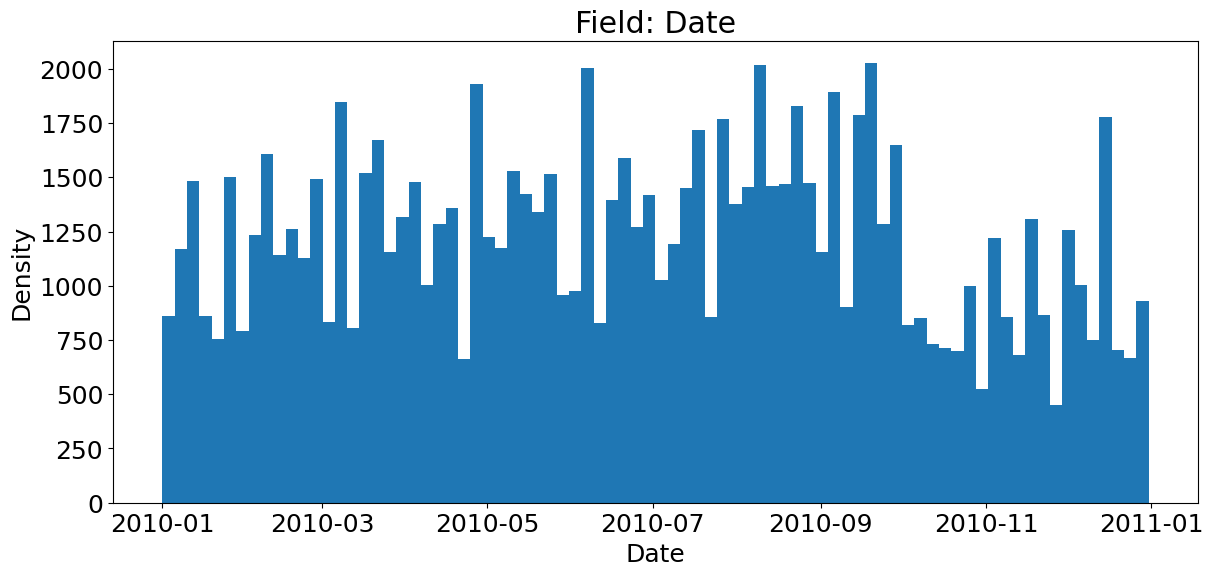

In [18]:
# Copy and use this cell as many times as needed to make customized plots for individual NUMERIC fields

plt.rcParams.update({'figure.figsize':(14,6)}) # make the plot size appropriate for the data
plt.rcParams.update({'font.size':18}) # make the font size appropriate for the plot
col = 'Date' # select a particular numeric field
data['Date'] = pd.to_datetime(data['Date'])
# set good x range values to make a plot that shows the important info as best as possible
# xlow = 20170101
# xhigh = 20171231
# plt.xlim(xlow,xhigh)
# let the bins span only the x range desired
# temp = data[data[col]<xhigh]
# temp = temp[temp[col]>xlow]
# plt.yscale('log') # use log y when the y range is so large that the bins to the right are really small
# plt.ylim(.1,1000000) # choose this to only show the decades needed
plt.hist(data[col], bins=80)
plt.xlabel(col)
plt.ylabel('Density')
plt.title('Field: ' + col)

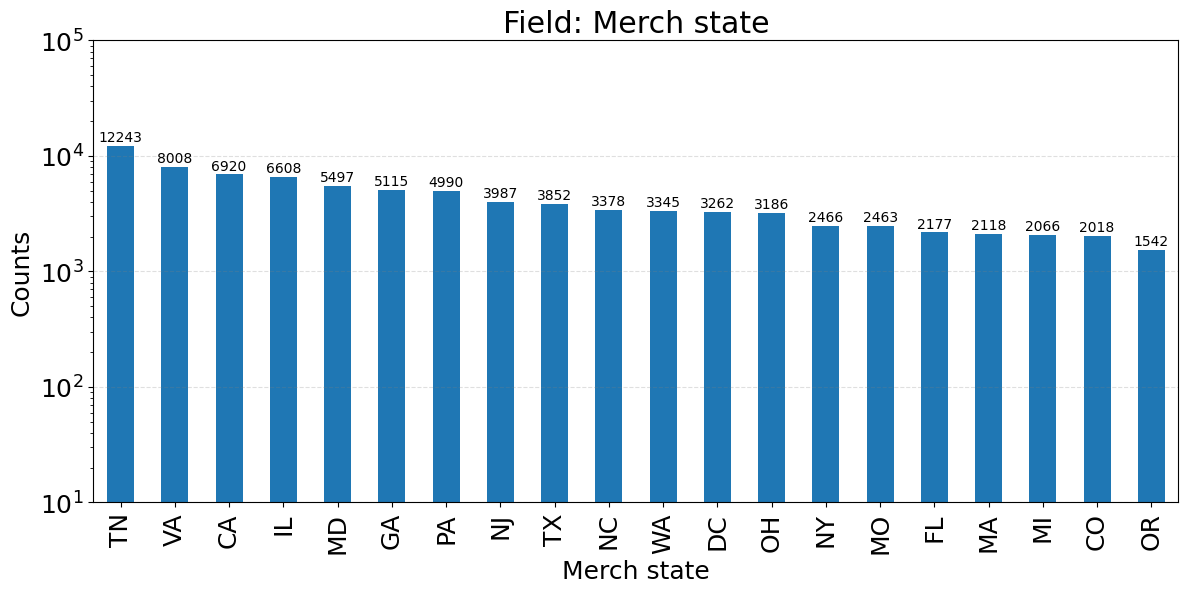

In [19]:
# Copy and use this cell as many times as needed to make customized plots for individual CATEGORICAL fields

plt.rcParams.update({'figure.figsize':(14,6)}) # make the plot size appropriate for the data
plt.rcParams.update({'font.size':18}) # make the font size appropriate for the plot
col='Merch state' # select a particular categorical field
counts = data[col].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=90) # set this to what looks best
for i, v in enumerate(counts):
#     vdelta = v + counts.max()*.01 # this works better for lin y plots
    vdelta = v*1.1 # this works better for log y plots
    ax.text(i, vdelta, v, ha='center', color='black', fontsize=10)

plt.yscale('log') # use log y when the y range is so large that the bins to the right are really small
plt.ylim(10,100000) # choose this to only show the decades needed
plt.title('Field: ' + col)
plt.xlabel(col)
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.show()

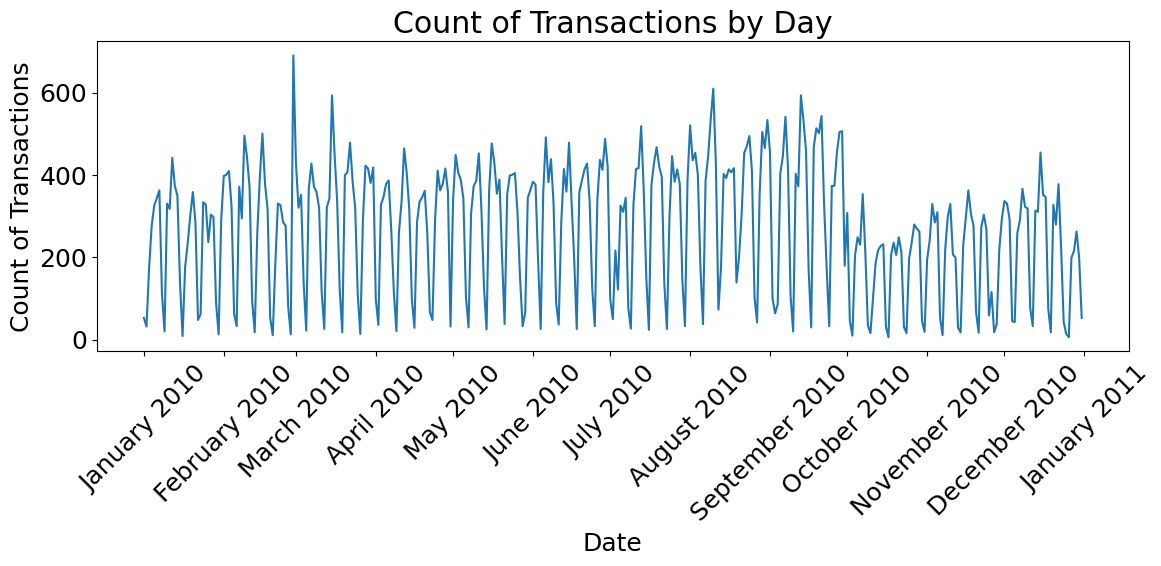

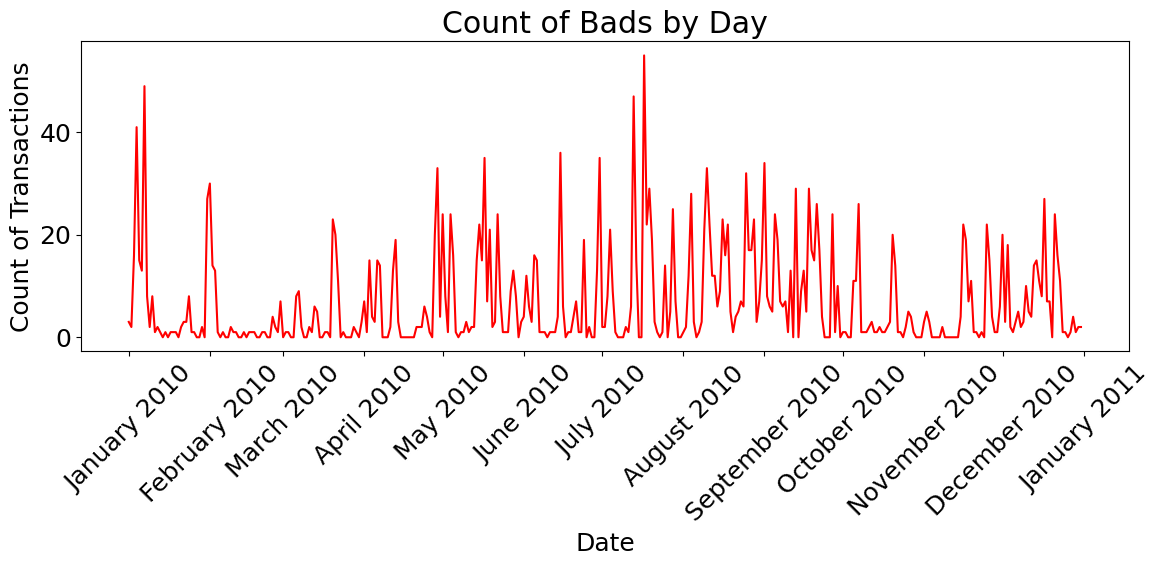

In [ ]:
import matplotlib.dates as mdates
time_field = 'Date' # after this, do whatever you need to to make this a datetime field
temp = data.copy()
# temp['appyear'] = (temp['date'] / 10000).astype('int')
# temp['appmonth'] = ((temp['date'] - temp['appyear'] * 10000) / 100).astype('int')
# temp['appday'] = temp['date'] - temp['appyear'] * 10000 - temp['appmonth'] * 100
# temp['date'] = pd.to_datetime(temp.appyear*10000+temp.appmonth*100+temp.appday,format='%Y%m%d')
temp[time_field] = pd.to_datetime(temp[time_field]) # you may have to adjust this for your particular time field
temp.sort_values(by=[time_field],inplace=True)
temp.set_index(time_field, inplace=True)
daily_counts = temp.resample('D').size()
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(daily_counts.index, daily_counts, marker='', linestyle='-')  # Plot as a line chart
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))  # Format ticks as full month name followed by year
plt.title('Count of Transactions by Day')
plt.xlabel('Date')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout

# If it's a binary classification problem, separate the types and plot
dep_var = 'Fraud' # do whatever you need to do to separate the two types
# temp[dep_var] = temp[dep_var].astype(str)
# goods = temp[temp[dep_var] == 'False']
# bads = temp[temp[dep_var] == 'True']
goods = temp[temp[dep_var] == 0]
bads = temp[temp[dep_var] == 1]
daily_counts_goods = goods.resample('D').size()
daily_counts_bads = bads.resample('D').size()
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(daily_counts_bads.index, daily_counts_bads, marker='', linestyle='-', color='r')  # Plot as a line chart
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))  # Format ticks as full month name followed by year
plt.title('Count of Bads by Day')
plt.xlabel('Date')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout

In [22]:
print('duration: ', dt.datetime.now() - start_time)

duration:  0:00:04.740615
